In [1]:
import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Data Import

In [2]:
FishData = pd.read_csv(r"C:\Users\Sai\Desktop\python\Machine Learning\Linear Regression using Python\Fish_Data.csv") 
FishData

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
153,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
154,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
155,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
156,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


## Q.1 Plot a bar chart showing count of individual species?

In [3]:
FishData.Species.value_counts()

Perch        56
Bream        35
Roach        19
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

Text(0, 0.5, 'Count of Species')

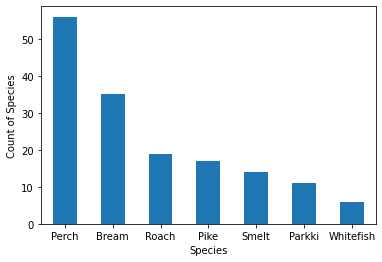

In [4]:
FishData['Species'].value_counts().plot.bar(rot=0)
plt.xlabel('Species')
plt.ylabel('Count of Species')

In [5]:
FishData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  158 non-null    object 
 1   Weight   158 non-null    float64
 2   Length1  158 non-null    float64
 3   Length2  158 non-null    float64
 4   Length3  158 non-null    float64
 5   Height   158 non-null    float64
 6   Width    158 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
FishData.describe() 

,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,26.293038,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.011427,10.731707,11.627605,4.295191,1.689010
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.150000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,25.300000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,32.700000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


##### To check Missing values

In [7]:
FishData.isna().sum() 

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

##### No missing data Found

## Q.2 Identify outliers and remove if any?

In [8]:
FishData=FishData.drop(['Species'], axis = 1)
FishData

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
153,12.2,11.5,12.2,13.4,2.0904,1.3936
154,13.4,11.7,12.4,13.5,2.4300,1.2690
155,12.2,12.1,13.0,13.8,2.2770,1.2558
156,19.7,13.2,14.3,15.2,2.8728,2.0672


##### First we check for Outliers 

<AxesSubplot:>

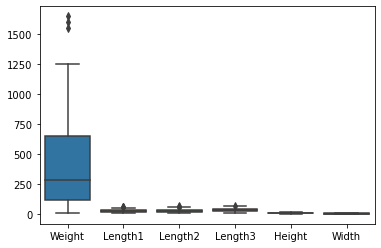

In [9]:
sns.boxplot(data=FishData)

Outliers found

Then we do Treatment On Outliers=Winsorizing

In [10]:
def treat_outliers(df):
    for i in df.columns:    
        q1=FishData[i].quantile(0.25)
        q3=FishData[i].quantile(0.75)
        iqr=q3-q1
        upper_limit=q3+1.5*iqr
        lower_limit=q1-1.5*iqr
        if ((FishData[i].dtype=='float64') | (FishData[i].dtype=='int64')):
            FishData[i][FishData[i]<= lower_limit] = lower_limit
            FishData[i][FishData[i]>= upper_limit] = upper_limit
        else:
            FishData[i]=FishData[i]
    return FishData
        
treat_outliers(FishData) 

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
153,12.2,11.5,12.2,13.4,2.0904,1.3936
154,13.4,11.7,12.4,13.5,2.4300,1.2690
155,12.2,12.1,13.0,13.8,2.2770,1.2558
156,19.7,13.2,14.3,15.2,2.8728,2.0672


Again we confirm the outliers remove or not

<AxesSubplot:>

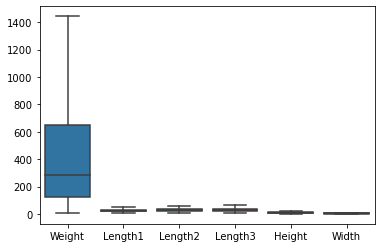

In [11]:
sns.boxplot(data=FishData)

At This way we remove outliers

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

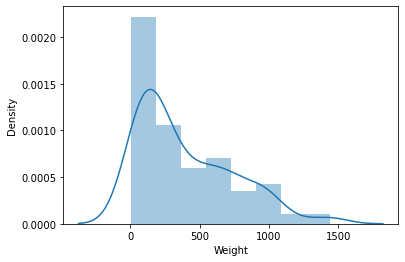

In [39]:
sns.distplot(FishData.Weight)

data is skew so that we do treatment on it

we will do sqrt Treatment on weight data 


## Q.3 Build a regression model and print regression equation?

We split the data by using ratio=70:30 as train and test respectively

In [12]:
X = FishData.drop('Weight', axis= 1)

y =np.sqrt(FishData[['Weight']])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=100)

In [13]:
df = pd.concat([y_train, X_train], axis=1)
df.head()

,Weight,Length1,Length2,Length3,Height,Width
6,22.360680,26.8,29.7,34.5,14.1795,5.2785
25,26.925824,31.8,35.0,40.9,16.3600,6.0532
21,26.172505,31.4,34.0,39.2,15.9936,5.3704
75,8.366600,15.7,17.4,18.5,4.5880,2.9415
84,11.401754,19.3,21.3,22.8,6.3840,3.5340


## Correlation

In [15]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.935883,0.940914,0.952873,0.812010,0.953776
Length1,0.935883,1.000000,0.999409,0.991891,0.618398,0.859344
Length2,0.940914,0.999409,1.000000,0.994292,0.631900,0.864567
Length3,0.952873,0.991891,0.994292,1.000000,0.689487,0.868172
Height,0.812010,0.618398,0.631900,0.689487,1.000000,0.788535
Width,0.953776,0.859344,0.864567,0.868172,0.788535,1.000000


###### Heatmap for Correlation

<AxesSubplot:>

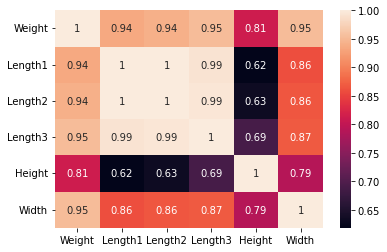

In [16]:
sns.heatmap(df.corr(),annot = True)

###### Scatterplot for x and y variables

<AxesSubplot:title={'center':'Weight vs Width'}, xlabel='Width', ylabel='Weight'>

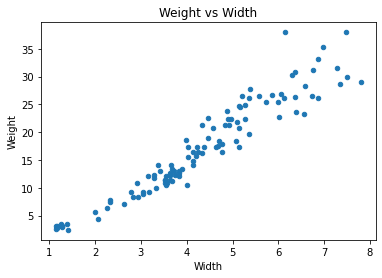

In [17]:
df.plot.scatter(x='Width', y='Weight', title='Weight vs Width')

###### we check MultiColinearity

In [18]:
X1=df.drop(['Weight'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Length1     9519.481820
Length2    14616.452141
Length3     2505.512246
Height        47.429536
Width         76.385737
dtype: float64

MultiColinearity Exist

In [19]:
df.head()

,Weight,Length1,Length2,Length3,Height,Width
6,22.360680,26.8,29.7,34.5,14.1795,5.2785
25,26.925824,31.8,35.0,40.9,16.3600,6.0532
21,26.172505,31.4,34.0,39.2,15.9936,5.3704
75,8.366600,15.7,17.4,18.5,4.5880,2.9415
84,11.401754,19.3,21.3,22.8,6.3840,3.5340


## Model Building
H0 :- There is no Linear relationship between Weight and Length1,Length2,Length3,Height,Width

Vs

H1 :- There is Linear relationship between Weight and Length1,Length2,Length3,Height,Width

Alpha = 0.05 (5%)

In [20]:
import statsmodels.formula.api as smf
model = smf.ols('Weight ~ Length1+Length2+Length3+Height+Width',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1139.
Date:                Tue, 24 May 2022   Prob (F-statistic):           4.46e-89
Time:                        16:00:09   Log-Likelihood:                -172.11
No. Observations:                 110   AIC:                             356.2
Df Residuals:                     104   BIC:                             372.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.4588      0.334    -19.348      0.000      -7.121      -5.797
Length1        0.1687      0.405      0.417      0.678      -0.634       0.972
Length2        0.0855      0.464      0.184      0.854      -0.834       1.005
Length3        0.1615      0.174      0.928      0.356      -0.184       0.507
Height         0.4146      0.081      5.123      0.000       0.254       0.575
Width          1.9216      0.217      8.842      0.000       1.491       2.353
==============================================================================
Omnibus:                       15.917   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.408
Skew:                           0.397   Prob(JB):                     2.27e-10
Kurtosis:                       6.010   Cond. No.                         286.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
import statsmodels.formula.api as smf
model2 = smf.ols('Weight ~ Length1+Height',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     1432.
Date:                Tue, 24 May 2022   Prob (F-statistic):           5.96e-78
Time:                        16:00:09   Log-Likelihood:                -210.46
No. Observations:                 110   AIC:                             426.9
Df Residuals:                     107   BIC:                             435.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.9420      0.460    -12.931      0.000      -6.853      -5.031
Length1        0.6284      0.021     30.081      0.000       0.587       0.670
Height         0.7878      0.049     16.178      0.000       0.691       0.884
==============================================================================
Omnibus:                        9.012   Durbin-Watson:                   2.276
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               16.982
Skew:                           0.232   Prob(JB):                     0.000205
Kurtosis:                       4.868   Cond. No.                         83.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### There is Linear relationship between Weight and Length1,Height

96% is the accuracy of model, so we can say the model is good fit.

##### Y=(-5.9420)+(0.6284 * Length1)+(0.7878 * Height)  #this is equation of Regression model

###### Again check for multi-colinearity

Check it by using VIF

In [22]:
X1=df.loc[:,['Length1', 'Height']]
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])], 
                          index=X1.columns)
series_before

Length1    8.43961
Height     8.43961
dtype: float64

In [23]:
df.head()

,Weight,Length1,Length2,Length3,Height,Width
6,22.360680,26.8,29.7,34.5,14.1795,5.2785
25,26.925824,31.8,35.0,40.9,16.3600,6.0532
21,26.172505,31.4,34.0,39.2,15.9936,5.3704
75,8.366600,15.7,17.4,18.5,4.5880,2.9415
84,11.401754,19.3,21.3,22.8,6.3840,3.5340


### Assumptions of Model
* Linearity
* Homoscedasticity
* Normality
* Model error has to be Independently Identically Distributed.

In [24]:
Y=(-5.9420)+(0.6284*26.8)+(0.7878*14.1795)
Y

22.0697301

In [25]:
df['fitted_value']=model2.fittedvalues #Predicted Value
df['residual']=model2.resid  #Error
df.head()

,Weight,Length1,Length2,Length3,Height,Width,fitted_value,residual
6,22.360680,26.8,29.7,34.5,14.1795,5.2785,22.069639,0.291041
25,26.925824,31.8,35.0,40.9,16.3600,6.0532,26.929412,-0.003588
21,26.172505,31.4,34.0,39.2,15.9936,5.3704,26.389397,-0.216892
75,8.366600,15.7,17.4,18.5,4.5880,2.9415,7.538099,0.828502
84,11.401754,19.3,21.3,22.8,6.3840,3.5340,11.215218,0.186537


##### Linearity

<AxesSubplot:title={'center':'Weight vs Length1'}, xlabel='Length1', ylabel='Weight'>

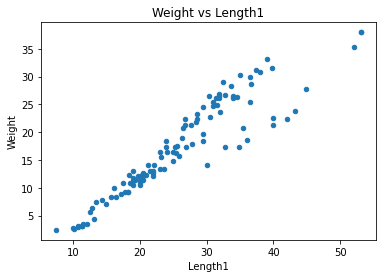

In [26]:
df.plot.scatter(x='Length1', y='Weight', title='Weight vs Length1')

##### Homoscedasticity

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

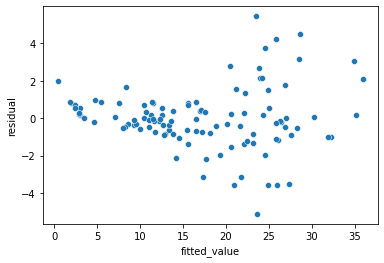

In [27]:
sns.scatterplot(x='fitted_value', y='residual',data=df)

##### Normality

C:\Users\Sai\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


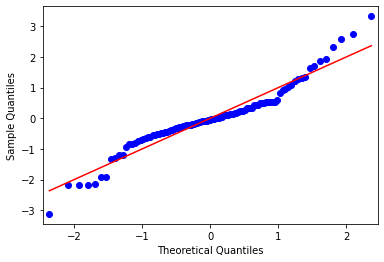

In [28]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s') 
plt.show()

##### Model error has to be IID

<AxesSubplot:ylabel='Frequency'>

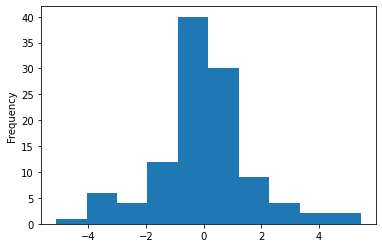

In [29]:
df['residual'].plot.hist()

C:\Users\Sai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='residual', ylabel='Density'>

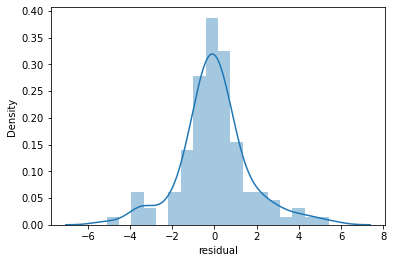

In [30]:
sns.distplot(df.residual) 

This data is Close to Normal

## Q4.What is the mean score of the model at 95% confidence interval?
By the Model mean score of the model at 95% confidence interval is between interval 0.025 and 0.975

and Upper Limit=-5.031 And Lower Limit=-6.853

## Q5.Compare real and predicted weights and give a conclusion statement based on it?

### Prediction on Test data

In [31]:
df1_test=pd.concat([X_test,y_test],axis=1)

df1_test.head()

,Length1,Length2,Length3,Height,Width,Weight
45,21.0,22.5,25.0,6.5500,3.3250,11.832160
11,28.7,31.0,36.2,14.3714,4.8146,22.360680
124,40.1,43.0,45.5,12.5125,7.4165,33.166248
15,29.4,32.0,37.2,15.4380,5.5800,24.494897
7,27.6,30.0,35.0,12.6700,4.6900,19.748418


##### we check for Prediction

In [32]:
df1_test['Prediction']=model2.predict(df1_test) 
df1_test.head()

,Length1,Length2,Length3,Height,Width,Weight,Prediction
45,21.0,22.5,25.0,6.5500,3.3250,11.832160,12.414243
11,28.7,31.0,36.2,14.3714,4.8146,22.360680,23.414745
124,40.1,43.0,45.5,12.5125,7.4165,33.166248,29.113759
15,29.4,32.0,37.2,15.4380,5.5800,24.494897,24.694917
7,27.6,30.0,35.0,12.6700,4.6900,19.748418,21.383103


(In above table Treatment values of weight as we do squaroot treatment on weight prior)

In [33]:
df1_test['Prediction']=model2.predict(df1_test) 
df1_test['Original_Prediction']=df1_test.Prediction**2
df1_test['Original_Weight']=df1_test.Weight**2
df1_test.head()

,Length1,Length2,Length3,Height,Width,Weight,Prediction,Original_Prediction,Original_Weight
45,21.0,22.5,25.0,6.5500,3.3250,11.832160,12.414243,154.113431,140.0
11,28.7,31.0,36.2,14.3714,4.8146,22.360680,23.414745,548.250289,500.0
124,40.1,43.0,45.5,12.5125,7.4165,33.166248,29.113759,847.610974,1100.0
15,29.4,32.0,37.2,15.4380,5.5800,24.494897,24.694917,609.838909,600.0
7,27.6,30.0,35.0,12.6700,4.6900,19.748418,21.383103,457.237113,390.0


## Conclusion
As Predicted data is close to Original Weight Values

This conclusion is on 96% Accuracy

Y=(-5.9420)+(0.6284 * Length1)+(0.7878 * Height)   #this is equation of Regression model

##### We check for Error values

In [34]:
df1_test['Error']=df1_test.Weight-df1_test.Prediction
df1_test['Square_Error']=(df1_test.Error)*(df1_test.Error)
df1_test.head()

,Length1,Length2,Length3,Height,Width,Weight,Prediction,Original_Prediction,Original_Weight,Error,Square_Error
45,21.0,22.5,25.0,6.5500,3.3250,11.832160,12.414243,154.113431,140.0,-0.582084,0.338821
11,28.7,31.0,36.2,14.3714,4.8146,22.360680,23.414745,548.250289,500.0,-1.054065,1.111054
124,40.1,43.0,45.5,12.5125,7.4165,33.166248,29.113759,847.610974,1100.0,4.052489,16.422665
15,29.4,32.0,37.2,15.4380,5.5800,24.494897,24.694917,609.838909,600.0,-0.200019,0.040008
7,27.6,30.0,35.0,12.6700,4.6900,19.748418,21.383103,457.237113,390.0,-1.634686,2.672198


Root Mean Square Error  

In [35]:
from sklearn.metrics import mean_squared_error

model_mse=mean_squared_error(df.Weight, df.fitted_value)
model_rmse=np.sqrt(model_mse)
model_rmse

1.639346542423981

In [36]:
np.mean(df1_test.Square_Error)

2.9352605165568146

In [37]:
import math
rmse = math.sqrt(2.9352605165568146)
rmse

1.7132602010660303

In [38]:
from sklearn.metrics import mean_squared_error

test_mse=mean_squared_error(df1_test.Weight, df1_test.Prediction)
test_rmse=np.sqrt(test_mse)
test_rmse

1.7132602010660307